Objective:
Implement a linear regression model to predict the car purchasing model based on
their Accuracy. **bold text**


Tasks:                    
• Automobiles and Vehicles                                           
• Linear Regression                          
• Decision Tree                       
• random Forest

In [ ]:
!pip install feature_engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.3/344.3 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 30.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.2.1 which is incompatible.


In [ ]:
!pip install yellowbrick

In [ ]:
# importing data operation libraries
import numpy as np
import pandas as pd

In [ ]:
# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
dataset = pd.read_csv('/content/Car_Purchasing_Data.csv')

In [ ]:
dataset.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(dataset.drop(['Car Purchase Amount'],axis=1),
                                                   dataset['Car Purchase Amount'],
                                                   test_size=0.2,
                                                   random_state=0)

x_train.shape, x_test.shape

((400, 8), (100, 8))

In [ ]:
# make a list of variable types
# numeric variables: discrete variables, continuous variable

discrete_variable = [var for var in x_train.columns if x_train[var].dtype != 'O' and x_train[var].nunique() < 10]
continuous_variable = [var for var in x_train.columns if x_train[var].dtype != 'O' and var not in discrete_variable]

# categorical variables
categorical_variable = [var for var in x_train.columns if x_train[var].dtype == 'O']

print('There are {} discrete variables'.format(len(discrete_variable)))
print('There are {} continuous variables'.format(len(continuous_variable)))
print('There are {} categorical variables'.format(len(categorical_variable)))

There are 1 discrete variables
There are 4 continuous variables
There are 3 categorical variables


In [ ]:
discrete_variable

['Gender']

In [ ]:
continuous_variable

['Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth']

In [ ]:
categorical_variable

['Customer Name', 'Customer e-mail', 'Country']

**Missing Data**

In [ ]:
x_train.isnull().sum()

Customer Name       0
Customer e-mail     0
Country             0
Gender              0
Age                 0
Annual Salary       0
Credit Card Debt    0
Net Worth           0
dtype: int64

In [ ]:
x_test.isnull().sum()

Customer Name       0
Customer e-mail     0
Country             0
Gender              0
Age                 0
Annual Salary       0
Credit Card Debt    0
Net Worth           0
dtype: int64

In [ ]:
# let's inspect the cardinality: number of labels within a categorical variable
for var in categorical_variable:
    print('Cardinality in {}: {}'.format(var,x_train[var].nunique()))

Cardinality in Customer Name: 398
Cardinality in Customer e-mail: 400
Cardinality in Country: 1


In [ ]:
def diagnostic_plot(df, var):
    fig = plt.figure(figsize=(12,4))

    plt.subplot(1,3,1)
    df[var].plot(kind='hist',bins=50)
    plt.title('Histogram')

    plt.subplot(1,3,2)
    stats.probplot(df[var], dist='norm', plot=plt)
    plt.ylabel('RM Quantiles')

    plt.subplot(1,3,3)
    sns.boxplot(y=df[var])
    plt.title('Boxplot')

    plt.show()

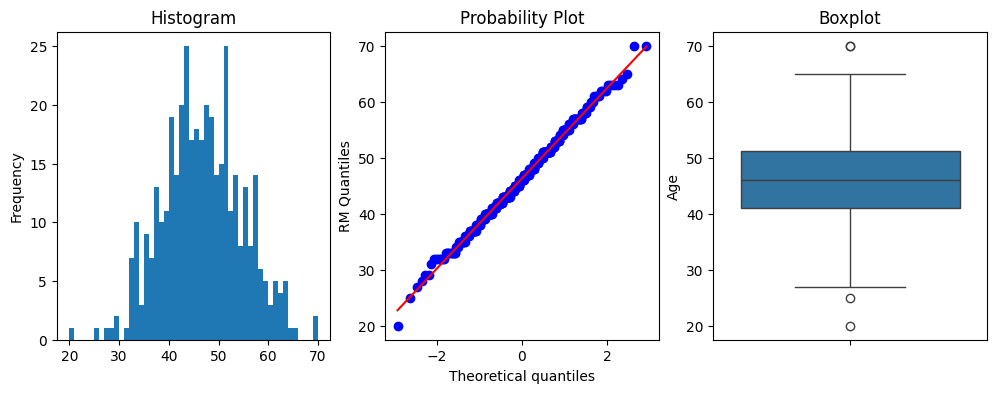

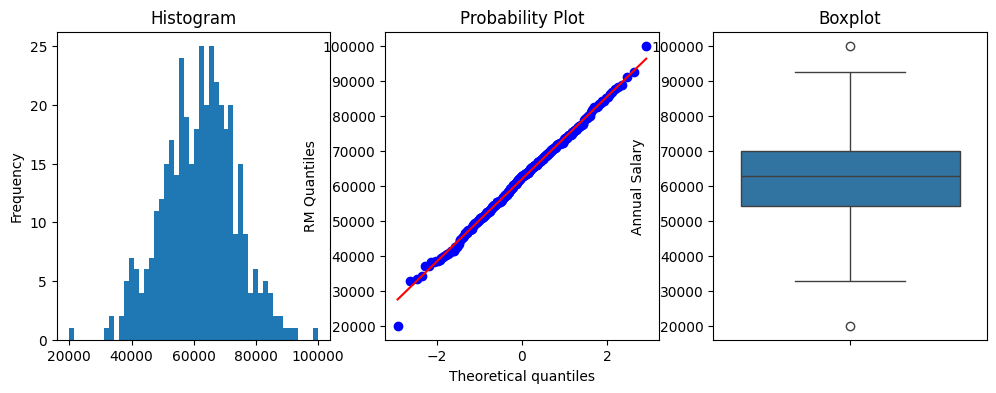

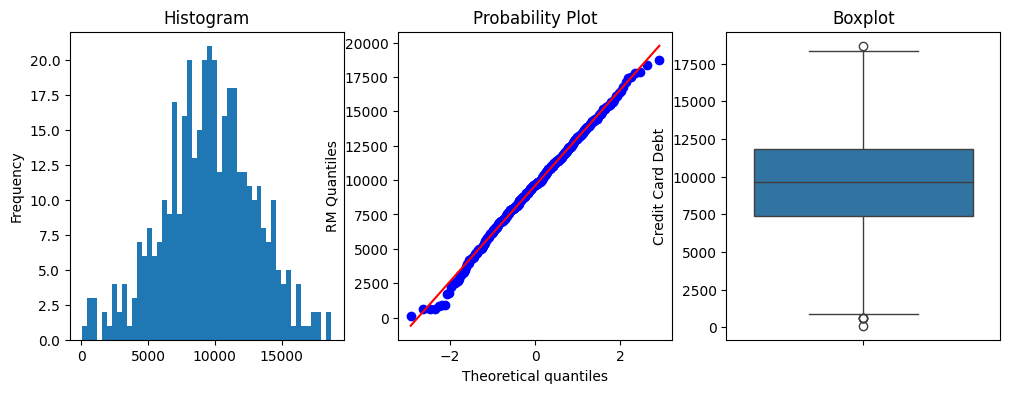

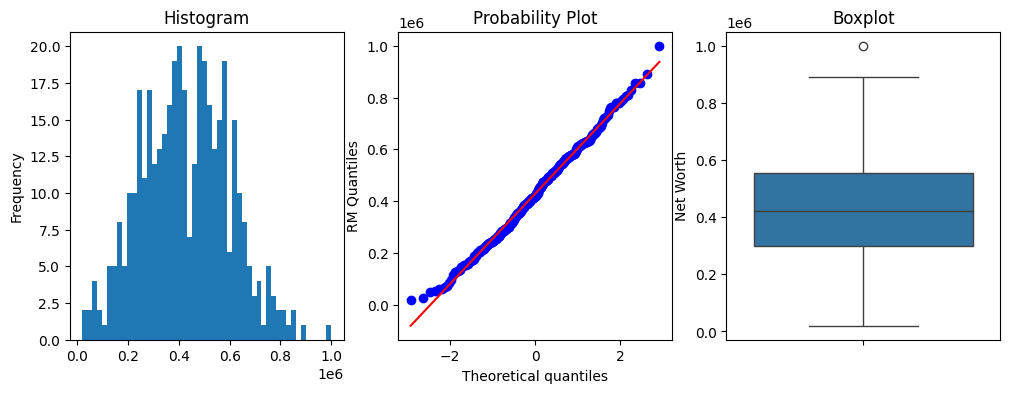

In [ ]:
for var in continuous_variable:
    diagnostic_plot(x_train, var)

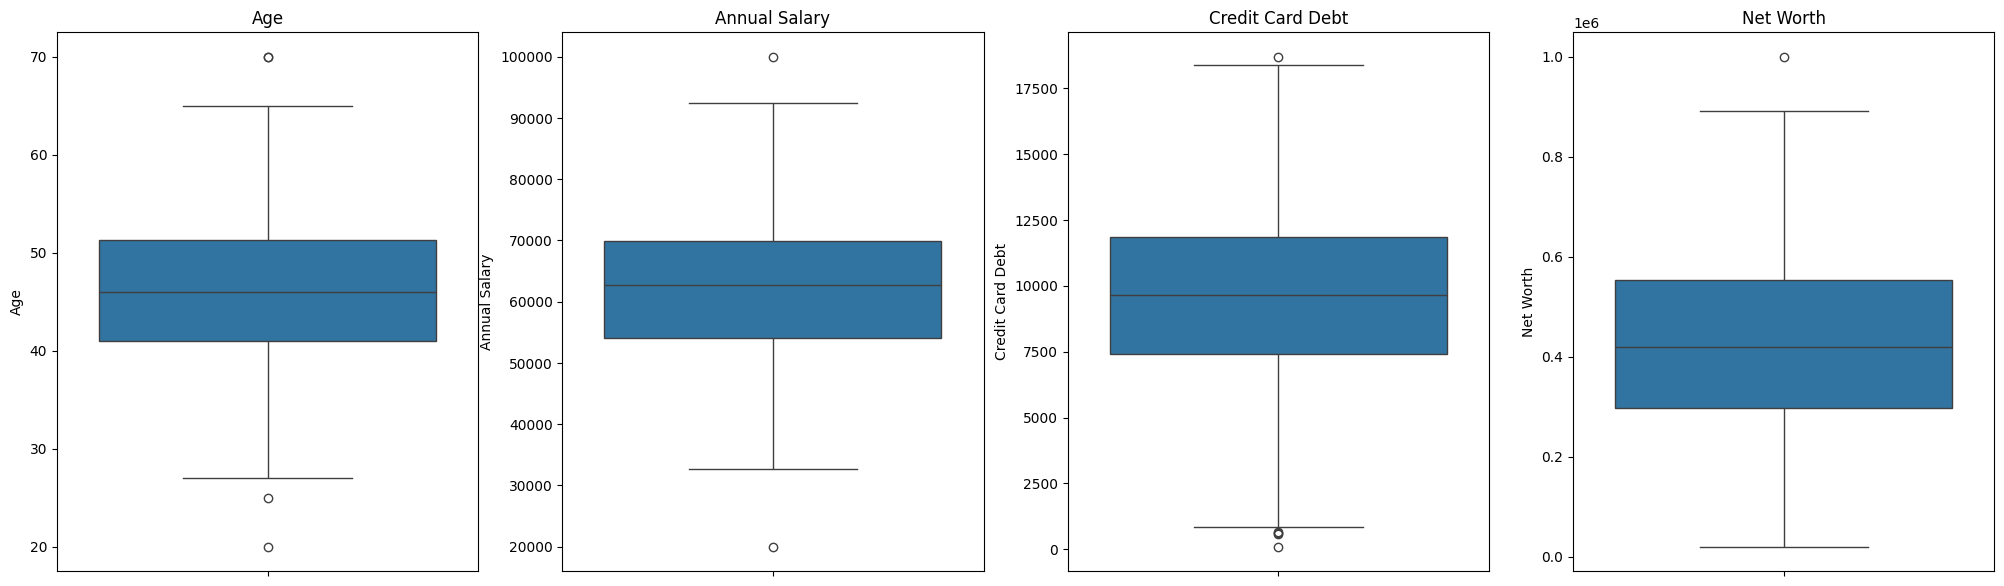

In [ ]:
# we can directly use boxplot to visualize outliers.
# boxplots are standard way of displaying the distribution of a variable, utilising
# the first quantile, the median, the third quantile, and the whiskers

i = 1
fig = plt.figure(figsize=(25,7))

for var in continuous_variable:
    plt.subplot(1,4,i)
    sns.boxplot(y=x_train[var])
    plt.title(var)
    i = i + 1

In [ ]:
# Function to find upper and lower boundaries
# for normally distributed variables.

def find_gaussian_boundries(df, var):


    # Calculate the boundaries
    # for a Gaussian distribution.

    lower_boundry = df[var].mean() - 3 * df[var].std()
    upper_boundry = df[var].mean() + 3 * df[var].std()

    return lower_boundry, upper_boundry

In [ ]:
continuous_variable

['Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth']

In [ ]:
# calculate boundaries for Age

age_lower_boundry, age_upper_boundry = find_gaussian_boundries(x_train, 'Age')
age_lower_boundry, age_upper_boundry


(22.223495870891504, 70.38150412910849)

In [ ]:
# calculate boundaries for Annual Salary

salary_lower_boundry, salary_upper_boundry = find_gaussian_boundries(x_train, 'Annual Salary')
salary_lower_boundry, salary_upper_boundry

(26718.726369922893, 97076.8735817771)

In [ ]:
# calculate boundries for Credit Card Debt

ccdebt_lower_boundry, ccdebt_upper_boundry = find_gaussian_boundries(x_train, 'Credit Card Debt')
ccdebt_lower_boundry, ccdebt_upper_boundry

(-825.0873948016542, 19997.399334744652)

In [ ]:
# calculate boundries for Net Worth

nw_lower_boundry, nw_upper_boundry = find_gaussian_boundries(x_train, 'Net Worth')
nw_lower_boundry, nw_upper_boundry

(-92530.3606226886, 949507.7064468388)

In [ ]:
def print_numers(df_train,continuous_var):

    print('Total users {}'.format(len(x_train)))

    lower_boundry, upper_boundry = find_gaussian_boundries(df_train, continuous_var)

    print()
    print('Users having {} less than lower boundry: {}'.format(var,len(x_train[x_train[var]<lower_boundry])))
    print('% Users having {} less than lower boundry: {}'.format(var,len(x_train[x_train[var]<lower_boundry])/len(x_train)))
    print()
    print('Users having {} more than upper boundry: {}'.format(var,len(x_train[x_train[var]>upper_boundry])))
    print('%Users having {} more than upper boundry: {}'.format(var,len(x_train[x_train[var]>upper_boundry])/len(x_train)))

In [ ]:
# Let's look at the number and percentage of outliers in each variable

for var in continuous_variable:
    print_numers(x_train, var)

Total users 400

Users having Age less than lower boundry: 1
% Users having Age less than lower boundry: 0.0025

Users having Age more than upper boundry: 0
%Users having Age more than upper boundry: 0.0
Total users 400

Users having Annual Salary less than lower boundry: 1
% Users having Annual Salary less than lower boundry: 0.0025

Users having Annual Salary more than upper boundry: 1
%Users having Annual Salary more than upper boundry: 0.0025
Total users 400

Users having Credit Card Debt less than lower boundry: 0
% Users having Credit Card Debt less than lower boundry: 0.0

Users having Credit Card Debt more than upper boundry: 0
%Users having Credit Card Debt more than upper boundry: 0.0
Total users 400

Users having Net Worth less than lower boundry: 0
% Users having Net Worth less than lower boundry: 0.0

Users having Net Worth more than upper boundry: 1
%Users having Net Worth more than upper boundry: 0.0025


**Multicolinearity**

<ipython-input-36-dc9a6dce7fb0>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = np.round(x_train.corr(),2)


<Axes: >

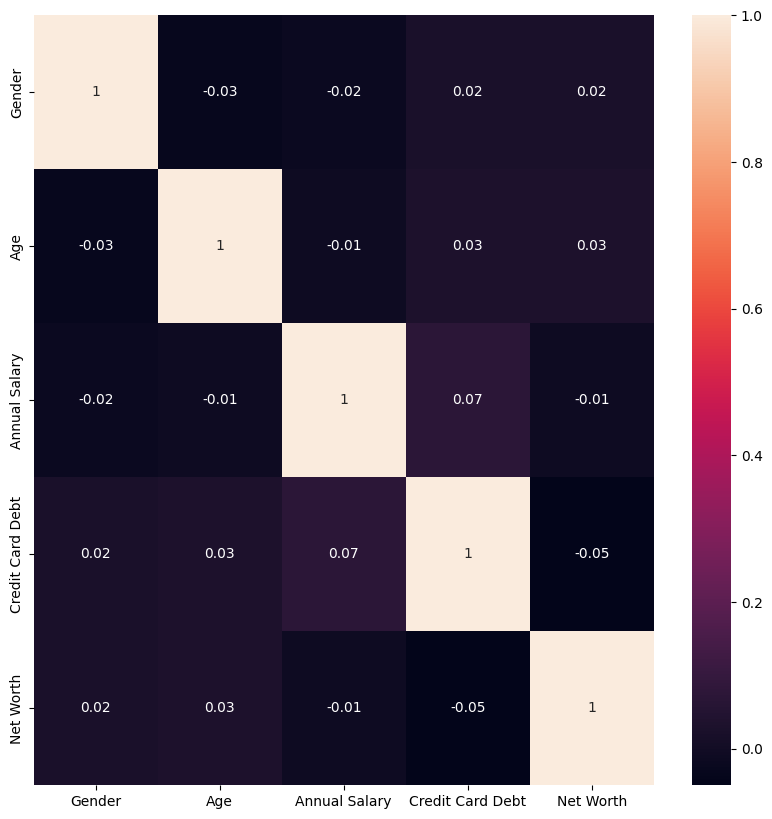

In [ ]:
# to determine co-linearity, we evaluate the correlation of independent variables

# we calculate the correlations using pandas corr()
# and we round the values to 2 decimals
correlation_matrix = np.round(x_train.corr(),2)

# plot the correlation matric using seaborn
# we use annot = true to print the correlation values

fig = plt.figure(figsize=(10,10))
sns.heatmap(data=correlation_matrix, annot=True)

**Feature Magnitude**

**Visualizations**

In [ ]:
x_train.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
count,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.510000,46.302500,61897.799976,9586.155970,428488.672912
std,0.500526,8.026335,11726.357869,3470.414455,173673.011178
min,0.000000,20.000000,20000.000000,100.000000,20000.000000
25%,0.000000,41.000000,54093.853330,7405.170891,297398.763175
50%,1.000000,46.000000,62701.660565,9648.837620,419939.345000
75%,1.000000,51.250000,69832.285215,11866.807658,553344.262325
max,1.000000,70.000000,100000.000000,18693.146520,1000000.000000


In [ ]:
# once again let's remind ourselves about the
# available variables in the dataframe
x_train.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
107,Wing Gray,urna.nec@tempusscelerisquelorem.org,USA,1,50,42433.54619,7335.524826,386057.4210
336,"Brady, Oscar Y.",erat@urnaUttincidunt.com,USA,0,51,71921.45038,6354.372629,169714.2655
71,Marvin Becker,congue.elit@vestibulumneceuismod.ca,USA,0,56,57393.82872,5627.803654,411831.0371
474,Avye,Cras@eros.net,USA,0,32,73558.87334,11164.526520,301245.7708
6,Griffin Rivera,vehicula@at.co.uk,USA,1,47,39814.52200,5958.460188,326373.1812


In [ ]:
from pandas.plotting import scatter_matrix

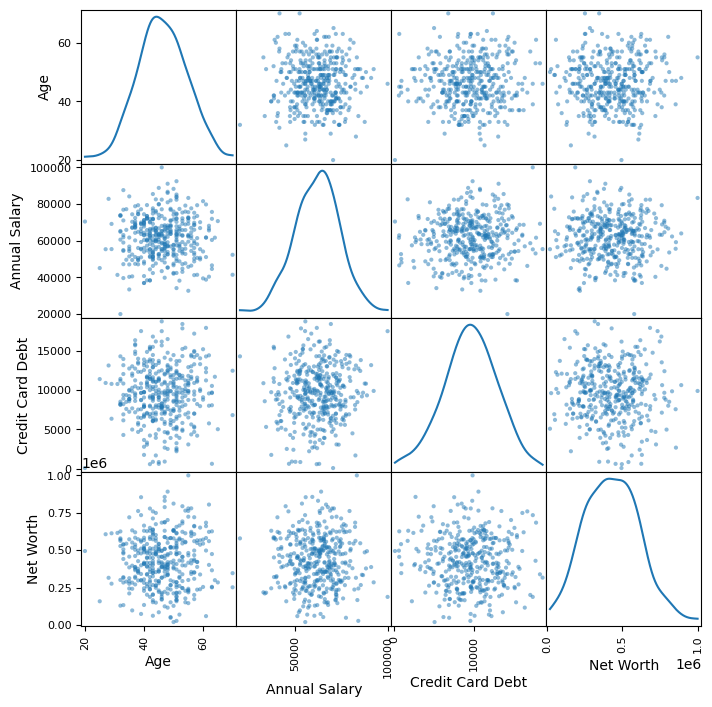

In [ ]:
scatter_matrix(x_train[continuous_variable],figsize=(8,8), diagonal='kde')
plt.show()

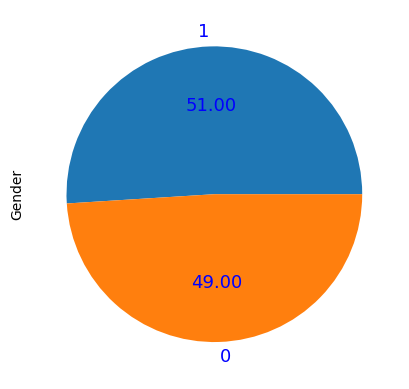

In [ ]:
x_train['Gender'].value_counts().plot.pie(fontsize=13, autopct = '%.2f',
                                        textprops={'color':'b'})
plt.show()

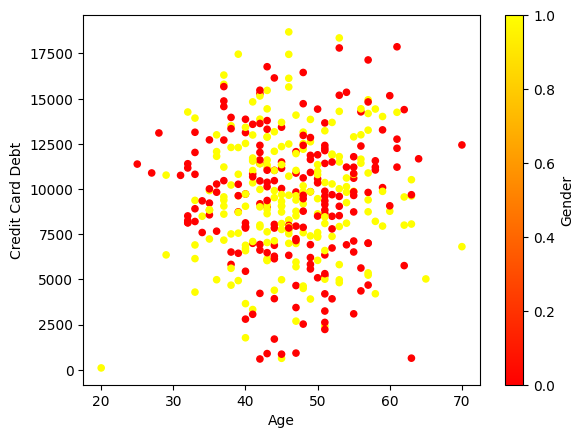

In [ ]:
x_train.plot.scatter(x = 'Age', y = 'Credit Card Debt', c = 'Gender',
                    cmap = plt.get_cmap('autumn'), sharex=False)
plt.show()

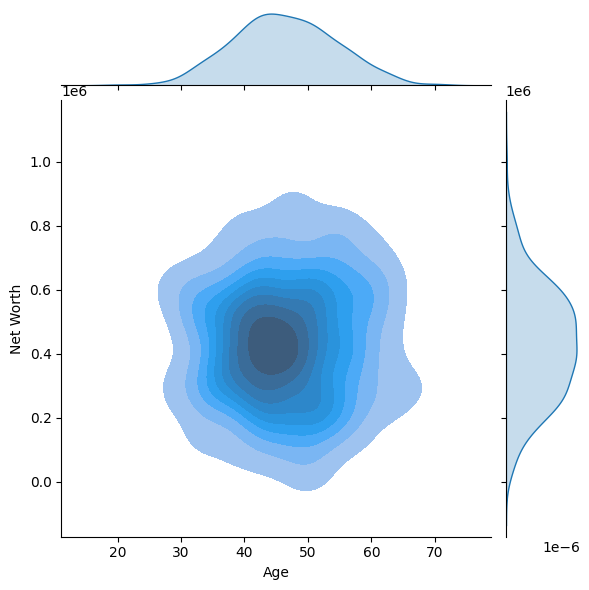

In [ ]:
sns.jointplot(x='Age',y='Net Worth',data=x_train,kind='kde',
             fill=True);

**Feature Engineering**
In this part I wiil perform feature engineering to leave the variables ready for use in machine learning model.

1) Categorical Encoding

2) Outliers capping

3) Transformation

4) Feature Scaling **bold text**

In [ ]:
discrete_variable

['Gender']

In [ ]:
categorical_variable

['Customer Name', 'Customer e-mail', 'Country']

In [ ]:
# removing the variables which are unique for each observation

x_train.drop(categorical_variable, axis=1, inplace=True)
x_test.drop(categorical_variable, axis=1, inplace=True)

**Categorical Encoding**

In [ ]:
# converting the data type of discrete variables in to object so I can do
# categorical encoding
for var in discrete_variable:
    x_train[var] = x_train[var].astype('O')

for var in discrete_variable:
    x_test[var] = x_test[var].astype('O')

In [ ]:
from feature_engine.encoding import MeanEncoder

In [ ]:
encoder = MeanEncoder(variables=discrete_variable)

encoder.fit(x_train,y_train)

x_train = encoder.transform(x_train)
x_test = encoder.transform(x_test)

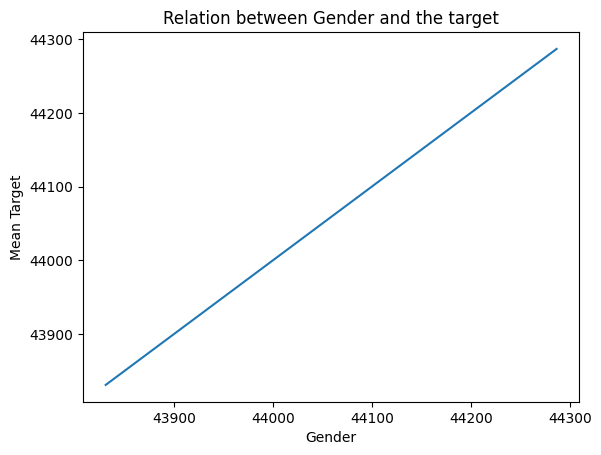

In [ ]:
tmp = pd.concat([x_train,y_train],axis=1)

for var in discrete_variable:
    fig = tmp.groupby([var])['Car Purchase Amount'].mean().plot()
    fig.set_title('Relation between {} and the target'.format(var))
    fig.set_ylabel('Mean Target')
    plt.show()

**Outlier Capping**

In [ ]:
from feature_engine.outliers import Winsorizer

In [ ]:
outlier_cap = Winsorizer(capping_method='gaussian',#because our variables are normally distributed
                         tail='both',#we have variables with outliers on both side
                         variables=continuous_variable)

outlier_cap.fit(x_train)

x_train = outlier_cap.transform(x_train)
x_test = outlier_cap.transform(x_test)

**Gaussian Transformation**

In [ ]:
from feature_engine.transformation import YeoJohnsonTransformer

In [ ]:
transformer = YeoJohnsonTransformer(variables=continuous_variable)

transformer.fit(x_train)

x_train = transformer.transform(x_train)
x_test = transformer.transform(x_test)

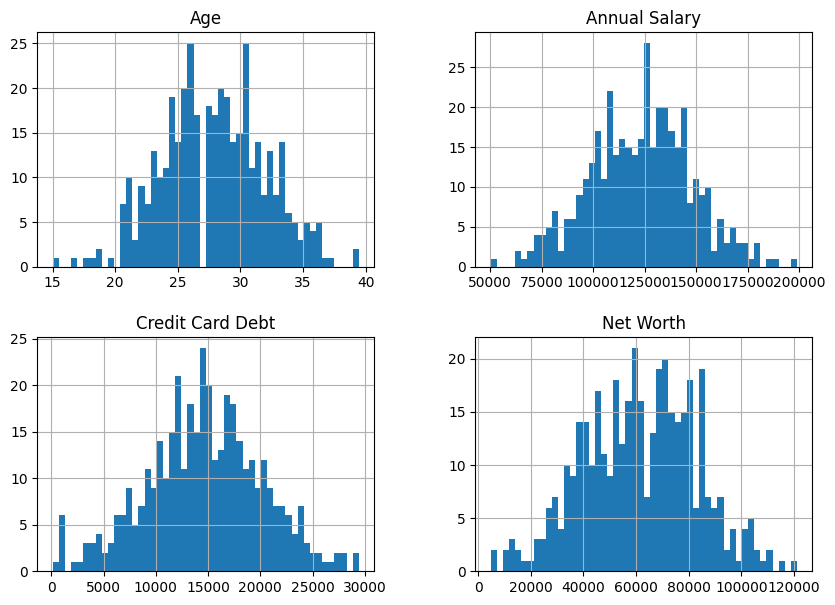

In [ ]:
x_train[continuous_variable].hist(bins=50, figsize=(10,7))
plt.show()

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
scaler = RobustScaler()

scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

**Model Building**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(x_train,y_train)

y_linear_pred = linear_reg.predict(x_test)

In [ ]:
print('Mean absolute error: ',mean_absolute_error(y_test,y_linear_pred))
print()
print('Root mean squared error: ', np.sqrt(mean_absolute_error(y_test,y_linear_pred)))
print()
print('R2 score: ',r2_score(y_test,y_linear_pred))

Mean absolute error:  237.0552169474743

Root mean squared error:  15.396597576980255

R2 score:  0.9991807881516424


In [ ]:
accuries = cross_val_score(linear_reg, x_train,y_train, cv=10)
print('Accuracy: {:.2f} %'.format(accuries.mean()*100))
print('Standard Deviation: {:.2f} %'.format(accuries.std()*100))

Accuracy: 99.80 %
Standard Deviation: 0.10 %


In [ ]:
from yellowbrick.regressor import ResidualsPlot

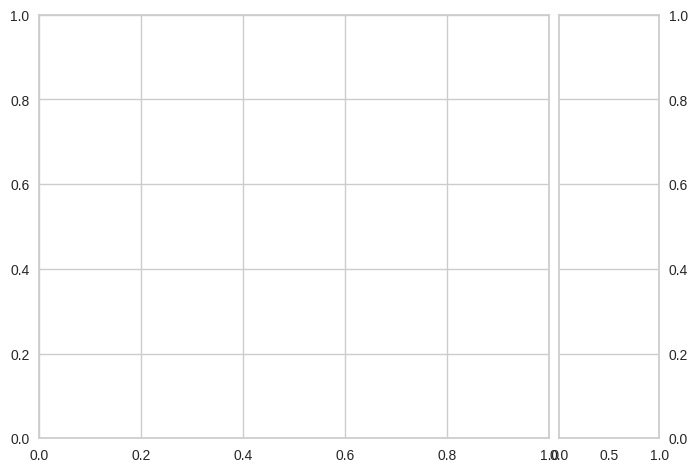

In [ ]:
visualizer = ResidualsPlot(linear_reg)

**Voila! our r2_score is 99%.**

However we don't want to take a chance because our dataset has only 500 observations so we are not sure whether we have been lucky with our model prediction and that the model would continue to give such prediction for future dataset.

We can use k-fold cross validation to check the performance from accross the iterations to determine the average range and the standard deviation.

In [ ]:
accuries = cross_val_score(linear_reg, x_train,y_train, cv=10)
print('Accuracy: {:.2f} %'.format(accuries.mean()*100))
print('Standard Deviation: {:.2f} %'.format(accuries.std()*100))

Accuracy: 99.80 %
Standard Deviation: 0.10 %


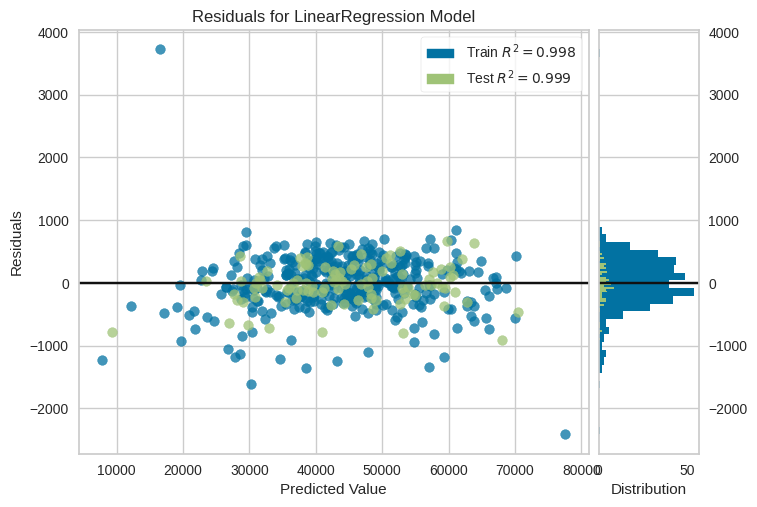

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
# now, let's do the residual analysis
from yellowbrick.regressor import ResidualsPlot


visualizer = ResidualsPlot(linear_reg)

visualizer.fit(x_train, y_train)  # Fit the training data to the model
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
visualizer.poof()

<Figure size 500x400 with 0 Axes>

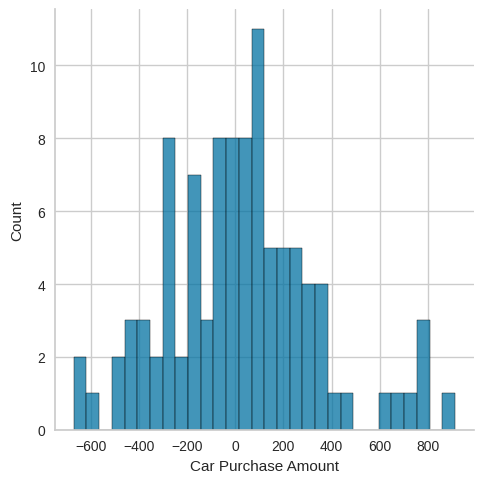

In [ ]:
# let's also examine the residual distribution
plt.figure(figsize=(5,4))
sns.displot(y_test-y_linear_pred, bins=30)
plt.show()

The residuals seem to be normally distributed and centered at 0.

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor


In [ ]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(x_train, y_train)
y_decision_tree_pred = decision_tree.predict(x_test)

In [ ]:
print('Decision Tree Metrics:')
print('Mean absolute error: ', mean_absolute_error(y_test, y_decision_tree_pred))
print('Root mean squared error: ', np.sqrt(mean_absolute_error(y_test, y_decision_tree_pred)))
print('R2 score: ', r2_score(y_test, y_decision_tree_pred))

Decision Tree Metrics:
Mean absolute error:  2989.8642926999996
Root mean squared error:  54.679651541501244
R2 score:  0.8635864904549013


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
random_forest = RandomForestRegressor()
random_forest.fit(x_train, y_train)
y_random_forest_pred = random_forest.predict(x_test)

In [ ]:
print('Random Forest Metrics:')
print('Mean absolute error: ', mean_absolute_error(y_test, y_random_forest_pred))
print('Root mean squared error: ', np.sqrt(mean_absolute_error(y_test, y_random_forest_pred)))
print('R2 score: ', r2_score(y_test, y_random_forest_pred))

Random Forest Metrics:
Mean absolute error:  1663.9392058389938
Root mean squared error:  40.7914109321925
R2 score:  0.9549506487358501


**Conclusion**

In [ ]:
linear_reg.intercept_

44221.05249450401

In [ ]:
linear_reg.coef_

pd.DataFrame(data=linear_reg.coef_, index=['Gender', 'Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth'], columns=['Coefficient'])

,Coefficient
Gender,38.675968
Age,8672.818866
Annual Salary,8910.492270
Credit Card Debt,28.566808
Net Worth,7331.575663


**Interpreting the Coefficient:**

Keeping all the other features fixed, a unit incerase in Age is associated with an increase of $ 8672.427170

Keeping all the other features fixed, a unit increase in Annual Salary is associated with an increase of $ 8910.115898

Keeping all the other features fixed, a unit increase in Net Worth is associated with an increase of $ 7331.601578

**Conclusion:** Company should focus on older population with Higher Annual salary.